In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from music import *

In [66]:
real_data_folder = "../data/"
real_data_1 = real_data_folder + "data_1.npz"
real_data_2 = real_data_folder + "data_2.npz"

In [67]:
def load_data(data_str):
    npz_data = np.load(data_str)
    return npz_data["XYZ"], npz_data["S"], float(npz_data["T_slot"]), float(npz_data["lambda_"]), npz_data["src_model"]

In [68]:
antenna_positions, cov, timeslot_durations, wavelength, transmitter_positions = load_data(real_data_1)
resolution = 0.15
thetas = np.arange(0, 360, resolution) * np.pi/180

In [69]:
doas = 4

In [70]:
doas, _, _, psd = music_algorithm(cov[0], antenna_positions, wavelength, doas, resolution=resolution)

In [71]:
doas

array([ 91.8 , 203.1 , 221.25, 240.15])

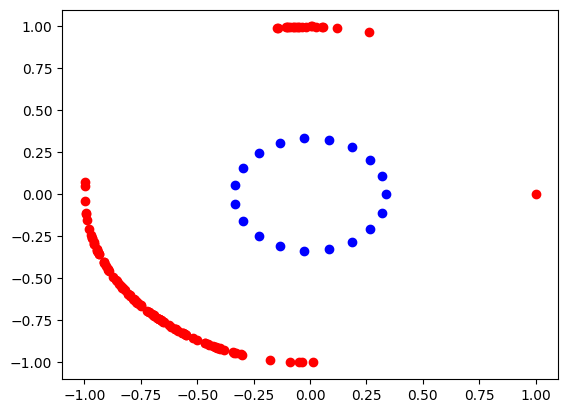

In [72]:
plt.plot(antenna_positions[:,0],
         antenna_positions[:,1],
         'bo',
         transmitter_positions[:,0],
         transmitter_positions[:,1],
         'ro'
)
plt.show()

In [73]:
transmitter_positions

array([[ 1.        ,  0.        ],
       [ 0.11795601,  0.99301882],
       [-0.10321586,  0.99465898],
       [-0.06388893,  0.99795702],
       [ 0.00750784,  0.99997182],
       [ 0.26181553,  0.96511794],
       [-0.04950654,  0.9987738 ],
       [ 0.0568445 ,  0.99838304],
       [-0.14325404,  0.98968595],
       [-0.14714987,  0.98911421],
       [-0.07573465,  0.99712801],
       [-0.01996745,  0.99980063],
       [-0.09711491,  0.99527318],
       [-0.05323413,  0.99858206],
       [ 0.02816825,  0.9996032 ],
       [-0.03474939,  0.99939606],
       [ 0.05188652,  0.99865299],
       [-0.10751013,  0.99420399],
       [-0.09082185,  0.99586716],
       [ 0.00250035,  0.99999687],
       [-0.07216455,  0.99739274],
       [-0.74923976, -0.66229886],
       [-0.91273249, -0.40855771],
       [-0.93476262, -0.35527292],
       [-0.71530225, -0.69881521],
       [-0.61570969, -0.78797308],
       [-0.82241008, -0.56889512],
       [-0.5986534 , -0.80100818],
       [-0.99340119,

In [74]:
def cartesian_to_arg(cartesian_coords):
    return np.angle(cartesian_coords[0] + cartesian_coords[1] * 1j)

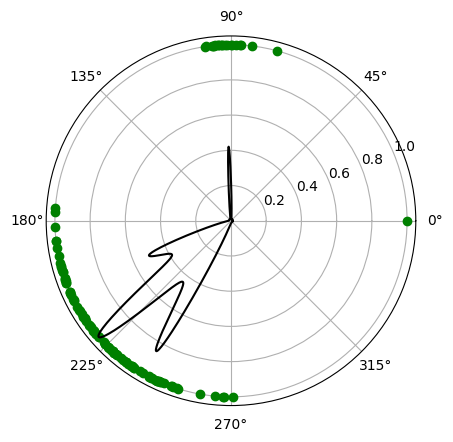

In [75]:
plt.polar(list(map(cartesian_to_arg,transmitter_positions)), np.ones(len(transmitter_positions)), "go", thetas, psd/np.max(psd), '-k')
plt.show()

In [76]:
# Try different number of doas for Music!